In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from numpy import interp

In [ ]:
water_data = pd.read_csv('waterQuality_new.csv')

In [40]:
water_data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [41]:
water_data.tail()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7994,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7998,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


In [42]:
water_data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [8]:
water_data.shape


(7999, 21)

In [43]:
# water_data.isnull().sum()

SyntaxError: invalid syntax (2549900349.py, line 1)

In [45]:
water_data.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [62]:
water_data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [46]:
water_data.sample(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7501,0.04,3.51,0.04,0.44,0.080,0.04,0.02,0.36,0.37,0.00,...,0.033,9.65,1.71,0.005,3.39,0.25,0.05,0.09,0.06,0
2359,0.06,28.93,0.03,2.84,0.003,5.60,0.37,1.38,0.63,0.97,...,0.017,3.83,1.39,0.004,3.30,0.00,0.04,0.35,0.06,0
6919,0.08,23.62,0.06,1.16,0.020,0.40,0.06,1.53,0.33,0.80,...,0.164,6.92,1.53,0.006,0.35,0.88,0.05,0.01,0.06,0
5166,0.06,18.95,0.04,0.18,0.040,0.02,0.06,0.36,1.39,0.00,...,0.116,3.63,0.13,0.001,0.13,6.98,0.06,0.05,0.08,0
3808,0.01,24.5,0.93,2.79,0.010,5.85,0.07,0.09,0.11,0.19,...,0.133,13.55,1.91,0.005,24.59,0.18,0.00,0.36,0.08,0


Text(0.5, 1.0, 'Safe water comparison chart')

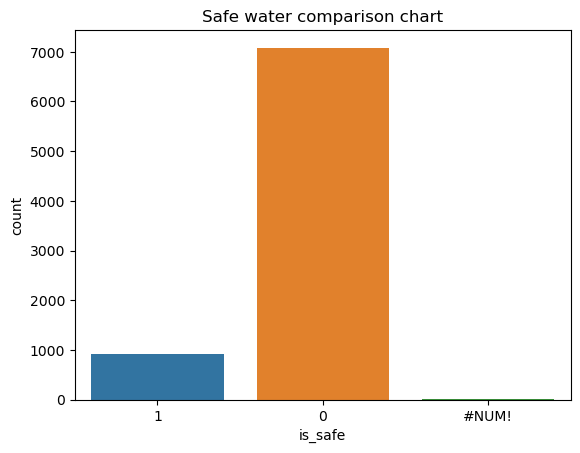

In [47]:
sns.countplot(data=water_data, x='is_safe')
plt.title('Safe water comparison chart')

Courtesy of: https://www.kaggle.com/datasets/mssmartypants/water-quality?select=waterQuality1.csv


aluminium - dangerous if greater than 2.8
ammonia - dangerous if greater than 32.5
arsenic - dangerous if greater than 0.01
barium - dangerous if greater than 2
cadmium - dangerous if greater than 0.005
chloramine - dangerous if greater than 4
chromium - dangerous if greater than 0.1
copper - dangerous if greater than 1.3
flouride - dangerous if greater than 1.5
bacteria - dangerous if greater than 0
viruses - dangerous if greater than 0
lead - dangerous if greater than 0.015
nitrates - dangerous if greater than 10
nitrites - dangerous if greater than 1
mercury - dangerous if greater than 0.002
perchlorate - dangerous if greater than 56
radium - dangerous if greater than 5
selenium - dangerous if greater than 0.5
silver - dangerous if greater than 0.1
uranium - dangerous if greater than 0.3
is_safe - class attribute {0 - not safe, 1 - safe}


In [ ]:
# histogram of the distribution of each feature in dataset
# getting a keyvalue error when trying to plot

# features = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride',
#            'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 
#            'silver', 'uranium']
# plt.figure(figsize=(20, 20))
# plot_data = water_data.drop('is_safe', axis=1)
# for i in enumerate(features):
#     plt.subplot(4, 4, i[0])
#     sns.histplot(
#     data=plot_data,
#     x=plot_data[i[-1]],
#     hue=water_data['is_safe'],
#     palette='pastel',
#     kde=True,
#     multiple='stack',
#     alpha=0.4)
#     plt.xticks(rotation=25)

In [48]:
# checking for correlations in the data 

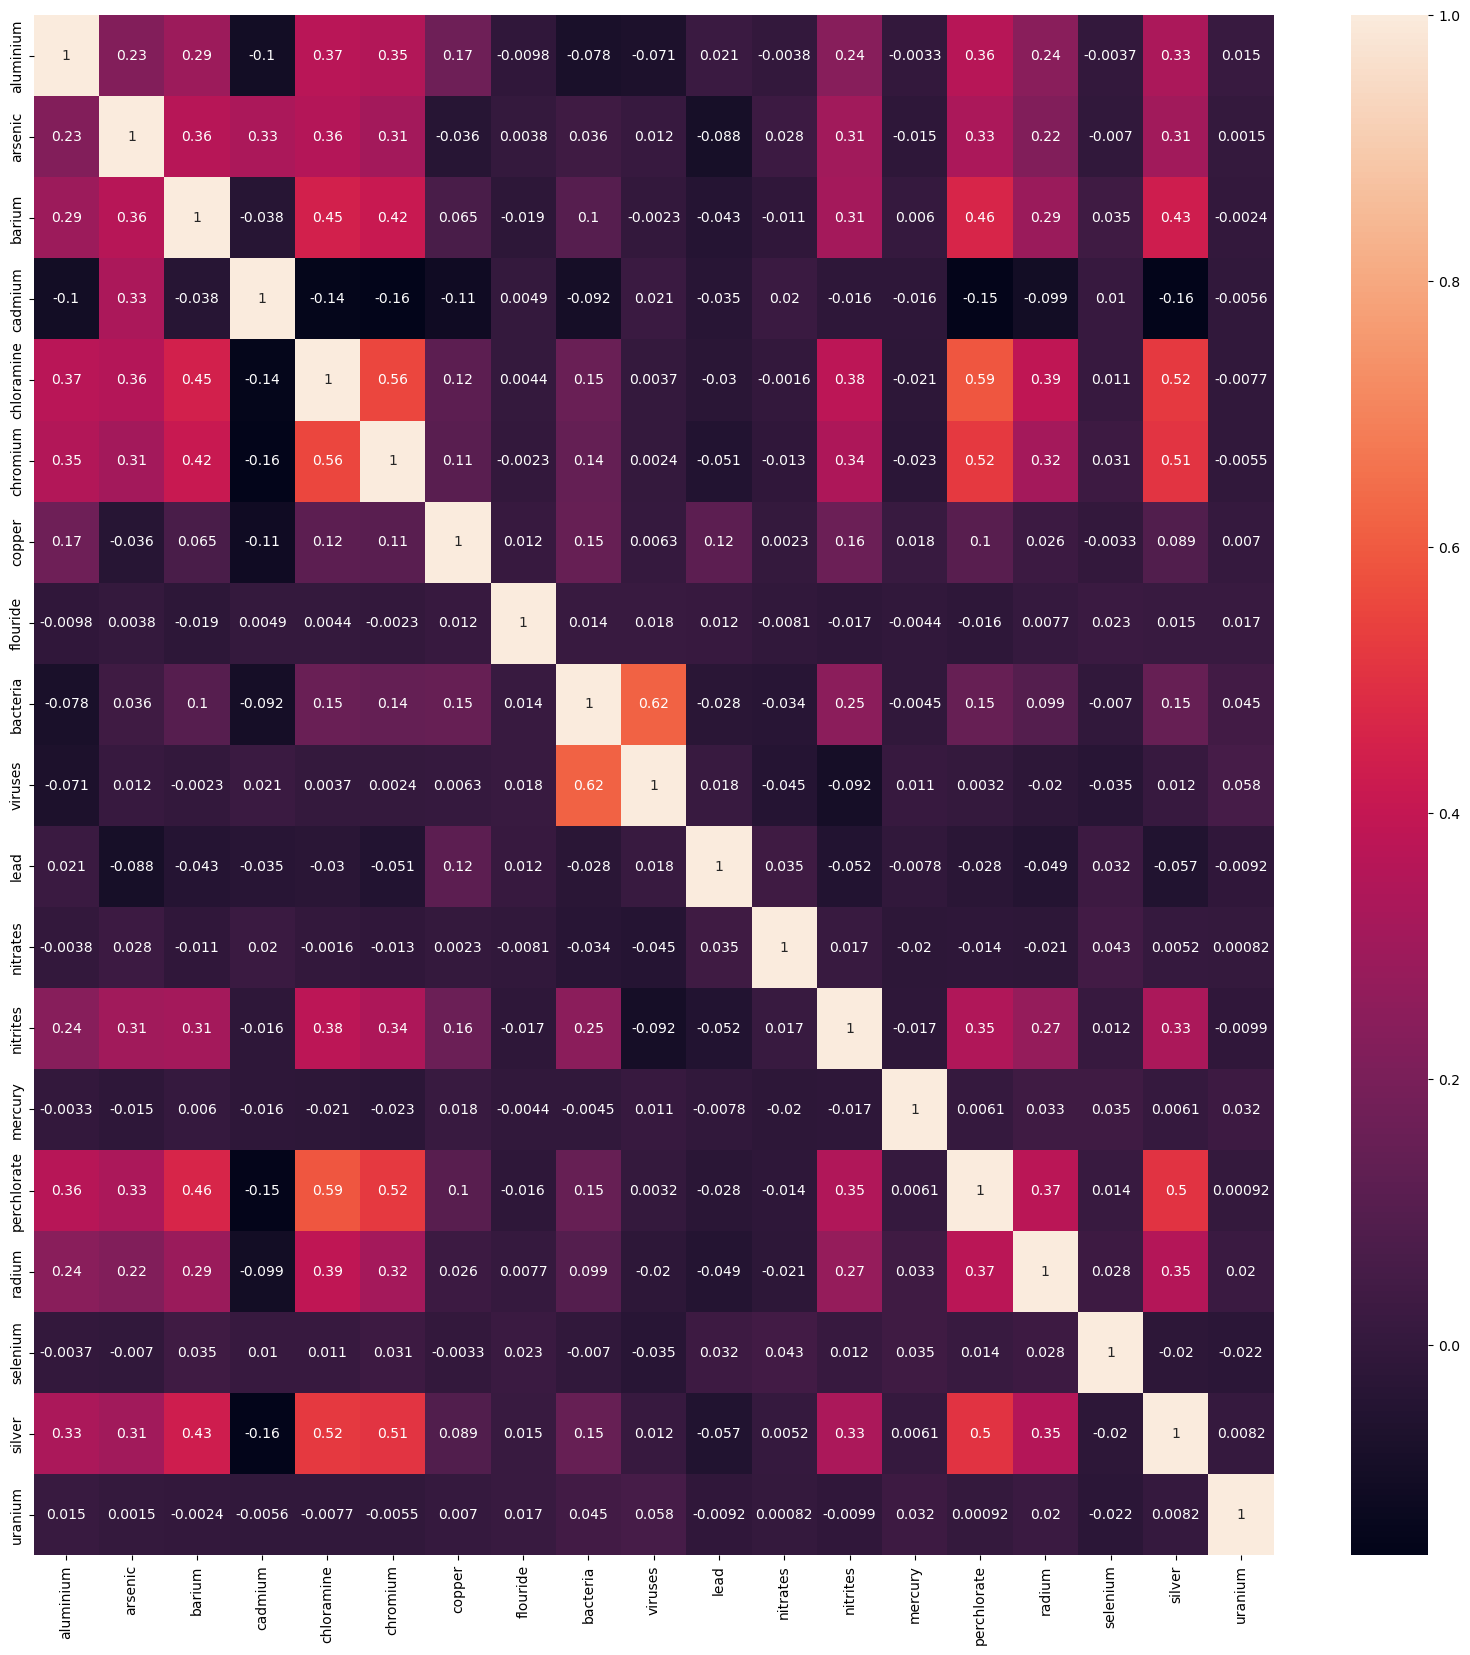

In [50]:
plt.figure(figsize=(20,20))
# create a heatmap to show the correlation
sns.heatmap(water_data.corr(), annot=True)
plt.show()

In [51]:
# creating boxplots of the data

<Figure size 500x500 with 0 Axes>

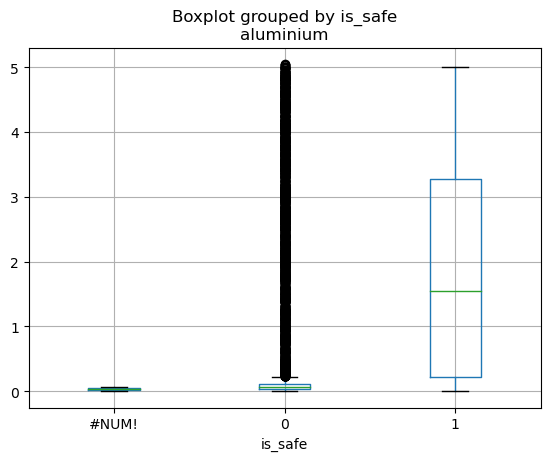

In [74]:
plt.figure(figsize=(5,5))
water_data.boxplot(column='aluminium', by='is_safe', grid=True)
plt.show()

<Figure size 500x500 with 0 Axes>

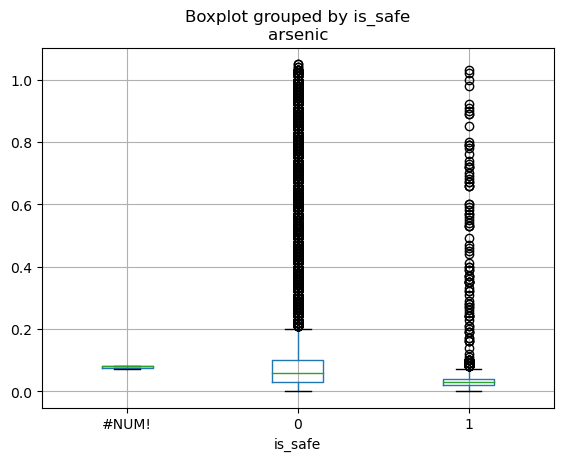

In [73]:
plt.figure(figsize=(5,5))
water_data.boxplot(column='arsenic', by='is_safe', grid=True)
plt.show()

<Figure size 500x500 with 0 Axes>

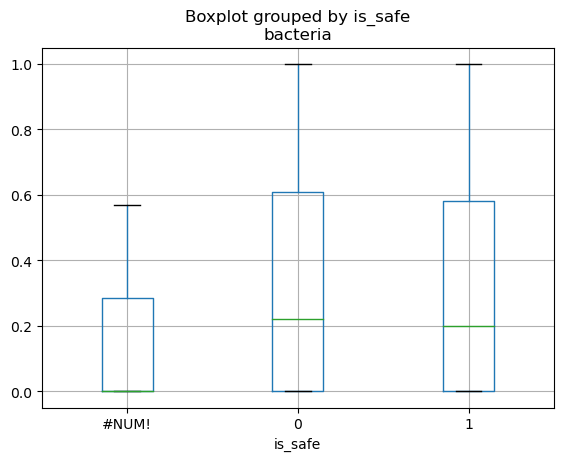

In [72]:
plt.figure(figsize=(5,5))
water_data.boxplot(column='bacteria', by='is_safe', grid=True)
plt.show()

<Figure size 500x500 with 0 Axes>

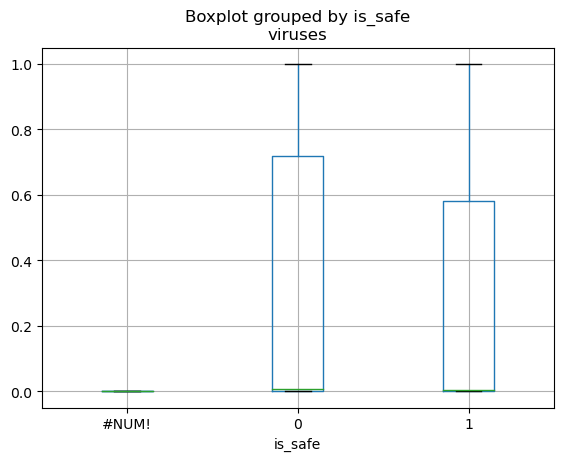

In [71]:
plt.figure(figsize=(5,5))
water_data.boxplot(column='viruses', by='is_safe', grid=True)
plt.show()

<Figure size 500x500 with 0 Axes>

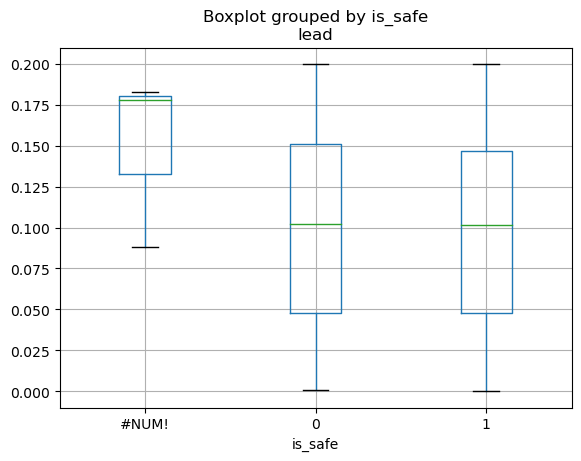

In [70]:
plt.figure(figsize=(5,5))
water_data.boxplot(column='lead', by='is_safe', grid=True)
plt.show()

<Figure size 500x500 with 0 Axes>

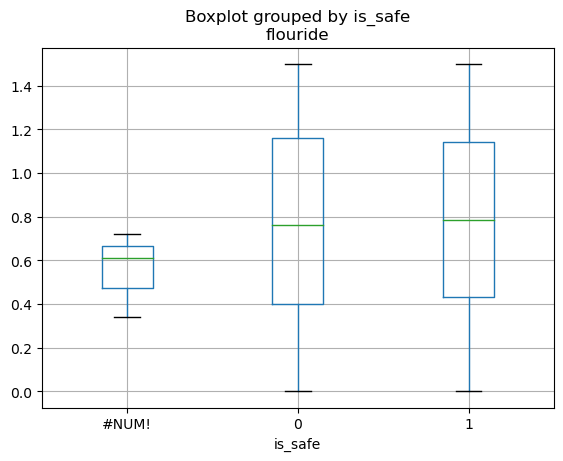

In [69]:
plt.figure(figsize=(5,5))
water_data.boxplot(column='flouride', by='is_safe', grid=True)
plt.show()

<Figure size 500x500 with 0 Axes>

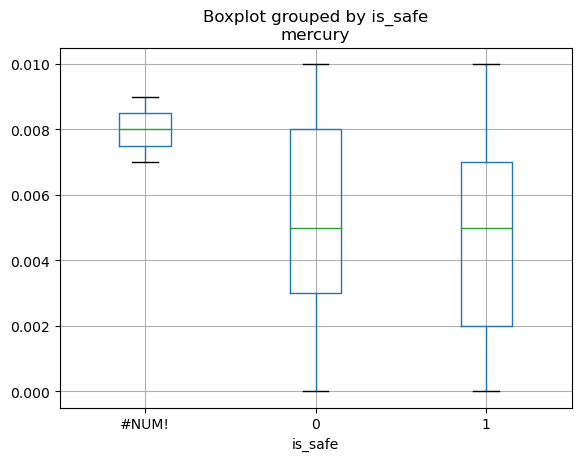

In [68]:
plt.figure(figsize=(5,5))
water_data.boxplot(column='mercury', by='is_safe', grid=True)
plt.show()

In [67]:
# plt.figure(figsize=(5,5))
# water_data.boxplot(column='flouride', grid=True)
# plt.show()